C:\Users\nafem\anaconda3\envs\gpu\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training time: 49.12 seconds
Test time: 1.81 seconds
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     77676
           1       0.85      0.80      0.82     77614

    accuracy                           0.83    155290
   macro avg       0.83      0.83      0.83    155290
weighted avg       0.83      0.83      0.83    155290



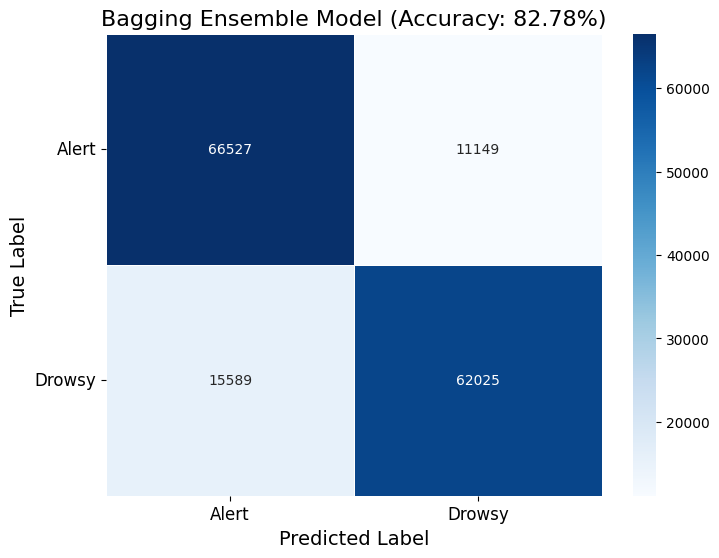

Accuracy: 0.8278189194410458
Precision: 0.8476371388744636
Recall: 0.7991470610972248
F1-score: 0.8226781972040216
AUC-ROC: 0.9117907399708219


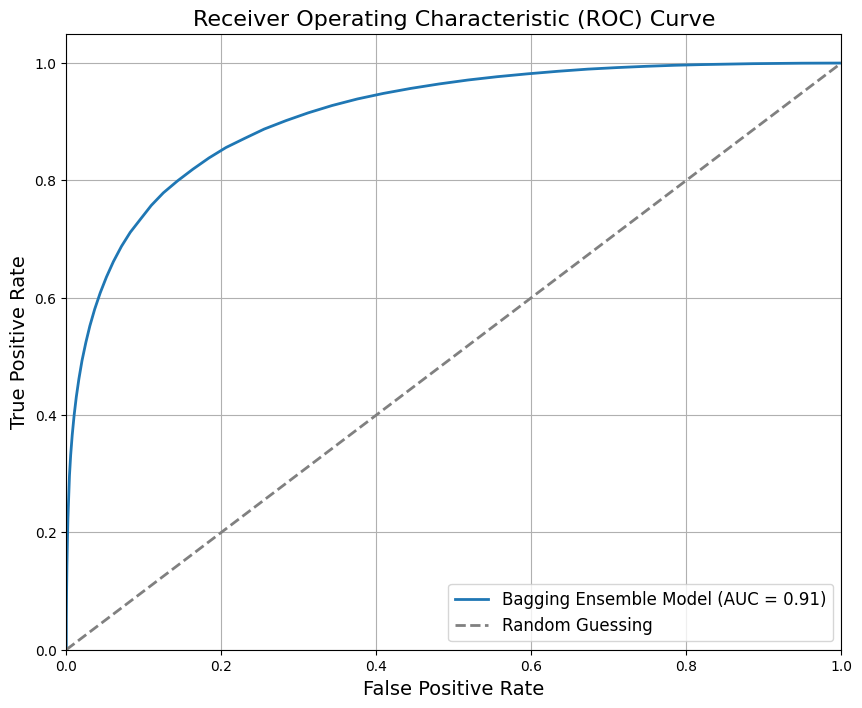

In [2]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # Base estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from time import time

# Load data
X_train = np.load('../Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../Train Test Dataset - Feature 5/y_test.npy')

# Create and train the Bagging ensemble
start_time = time()
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),  # Use DecisionTree as the base estimator
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,  # Fraction of the dataset for each estimator
    max_features=1.0,  # Use all features for each estimator
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)
bagging_model.fit(X_train, y_train)
end_time = time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Predictions
start_time_test = time()
ensemble_pred_test = bagging_model.predict(X_test)
ensemble_pred_test_proba = bagging_model.predict_proba(X_test)[:, 1]  # Probability for positive class
end_time_test = time()

test_time = end_time_test - start_time_test
print(f"Test time: {test_time:.2f} seconds")

# Classification Report
classification_report_str = classification_report(y_test, ensemble_pred_test)
print(classification_report_str)

# Confusion Matrix
class_labels = ["Alert", "Drowsy"]
conf_matrix = confusion_matrix(y_test, ensemble_pred_test)
accuracy = accuracy_score(y_test, ensemble_pred_test) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Bagging Ensemble Model (Accuracy: {accuracy:.2f}%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test)
recall = recall_score(y_test, ensemble_pred_test)
f1 = f1_score(y_test, ensemble_pred_test)
auc_roc = roc_auc_score(y_test, ensemble_pred_test_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

# ROC Curve
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred_test_proba)
roc_auc = auc(fpr, tpr)
roc_data['Bagging Ensemble Model'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curve
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()
